In [1]:
cd

C:\Users\Mudit


In [2]:
cd Downloads

C:\Users\Mudit\Downloads


In [3]:
cd "~MS-Mechanical engg courses"

[WinError 2] The system cannot find the file specified: 'C:\\Users\\MS-Mechanical engg courses'
C:\Users\Mudit\Downloads


In [4]:
cd ~MS-Mechanical engg courses

[WinError 2] The system cannot find the file specified: 'C:\\Users\\MS-Mechanical engg courses'
C:\Users\Mudit\Downloads


In [5]:
cd '~MS-Mechanical engg courses'

[WinError 2] The system cannot find the file specified: "'~MS-Mechanical engg courses'"
C:\Users\Mudit\Downloads


In [6]:
cd ~MS-Mechanical engg courses

[WinError 2] The system cannot find the file specified: 'C:\\Users\\MS-Mechanical engg courses'
C:\Users\Mudit\Downloads


In [7]:
cd

C:\Users\Mudit


In [8]:
cd Downloads

C:\Users\Mudit\Downloads


In [9]:
cd forward

C:\Users\Mudit\Downloads\forward


In [10]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [11]:
ls

 Volume in drive C is OS
 Volume Serial Number is 8CF0-5D03

 Directory of C:\Users\Mudit\Downloads\forward

04/10/2020  04:01 AM    <DIR>          .
04/10/2020  04:01 AM    <DIR>          ..
04/09/2020  10:52 PM         2,255,735 driving_log.csv
04/09/2020  10:23 PM    <DIR>          IMG
04/11/2020  02:40 AM         3,096,256 model.h5
               2 File(s)      5,351,991 bytes
               3 Dir(s)  92,081,938,432 bytes free


In [12]:
!pip3 install shapely

In [13]:
!pip3 install imgaug

In [23]:
import sys
!{sys.executable} -m pip install imgaug

  Using cached imgaug-0.4.0-py2.py3-none-any.whl (948 kB)
  Using cached Shapely-1.7.0-cp37-cp37m-win_amd64.whl (1.0 MB)


In [85]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D, Dense, MaxPooling2D, Flatten, Dropout
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2
import pandas as pd
import ntpath
import random

In [86]:
datadir = 'C:\\Users\\Mudit\\Downloads\\forward'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir,'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', None)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\Mudit\Downloads\~MS-Mechanical engg courses\Self_driving course - Udemy\Training data\forward\IMG\center_2020_04_09_02_41_27_998.jpg,C:\Users\Mudit\Downloads\~MS-Mechanical engg courses\Self_driving course - Udemy\Training data\forward\IMG\left_2020_04_09_02_41_27_998.jpg,C:\Users\Mudit\Downloads\~MS-Mechanical engg courses\Self_driving course - Udemy\Training data\forward\IMG\right_2020_04_09_02_41_27_998.jpg,0.0,0.0,0.0,0.000078
1,C:\Users\Mudit\Downloads\~MS-Mechanical engg courses\Self_driving course - Udemy\Training data\forward\IMG\center_2020_04_09_02_41_28_100.jpg,C:\Users\Mudit\Downloads\~MS-Mechanical engg courses\Self_driving course - Udemy\Training data\forward\IMG\left_2020_04_09_02_41_28_100.jpg,C:\Users\Mudit\Downloads\~MS-Mechanical engg courses\Self_driving course - Udemy\Training data\forward\IMG\right_2020_04_09_02_41_28_100.jpg,0.0,0.0,0.0,0.000078
2,C:\Users\Mudit\Downloads\~MS-Mechanical engg courses\Self_driving course - Udemy\Training data\forward\IMG\center_2020_04_09_02_41_28_206.jpg,C:\Users\Mudit\Downloads\~MS-Mechanical engg courses\Self_driving course - Udemy\Training data\forward\IMG\left_2020_04_09_02_41_28_206.jpg,C:\Users\Mudit\Downloads\~MS-Mechanical engg courses\Self_driving course - Udemy\Training data\forward\IMG\right_2020_04_09_02_41_28_206.jpg,0.0,0.0,0.0,0.000082
3,C:\Users\Mudit\Downloads\~MS-Mechanical engg courses\Self_driving course - Udemy\Training data\forward\IMG\center_2020_04_09_02_41_28_306.jpg,C:\Users\Mudit\Downloads\~MS-Mechanical engg courses\Self_driving course - Udemy\Training data\forward\IMG\left_2020_04_09_02_41_28_306.jpg,C:\Users\Mudit\Downloads\~MS-Mechanical engg courses\Self_driving course - Udemy\Training data\forward\IMG\right_2020_04_09_02_41_28_306.jpg,0.0,0.0,0.0,0.000083
4,C:\Users\Mudit\Downloads\~MS-Mechanical engg courses\Self_driving course - Udemy\Training data\forward\IMG\center_2020_04_09_02_41_28_413.jpg,C:\Users\Mudit\Downloads\~MS-Mechanical engg courses\Self_driving course - Udemy\Training data\forward\IMG\left_2020_04_09_02_41_28_413.jpg,C:\Users\Mudit\Downloads\~MS-Mechanical engg courses\Self_driving course - Udemy\Training data\forward\IMG\right_2020_04_09_02_41_28_413.jpg,0.0,0.0,0.0,0.000078


In [87]:
def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2020_04_09_02_41_27_998.jpg,left_2020_04_09_02_41_27_998.jpg,right_2020_04_09_02_41_27_998.jpg,0.0,0.0,0.0,0.000078
1,center_2020_04_09_02_41_28_100.jpg,left_2020_04_09_02_41_28_100.jpg,right_2020_04_09_02_41_28_100.jpg,0.0,0.0,0.0,0.000078
2,center_2020_04_09_02_41_28_206.jpg,left_2020_04_09_02_41_28_206.jpg,right_2020_04_09_02_41_28_206.jpg,0.0,0.0,0.0,0.000082
3,center_2020_04_09_02_41_28_306.jpg,left_2020_04_09_02_41_28_306.jpg,right_2020_04_09_02_41_28_306.jpg,0.0,0.0,0.0,0.000083
4,center_2020_04_09_02_41_28_413.jpg,left_2020_04_09_02_41_28_413.jpg,right_2020_04_09_02_41_28_413.jpg,0.0,0.0,0.0,0.000078


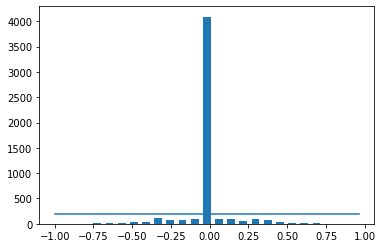

In [88]:
num_bins = 25
sample_per_bin = 200
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1] + bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (sample_per_bin, sample_per_bin))

total data: 5094
removed: 3889
remaining: 1205


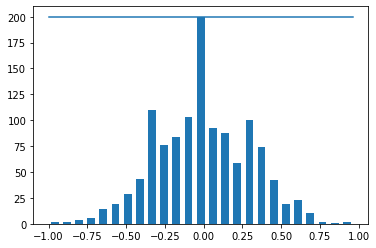

In [89]:
print('total data:', len(data))
remove_list = []
for j in range(num_bins):
    list_ = []
    for i in range(len(data['steering'])):
        if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
            list_.append(i)
    list_ = shuffle(list_)
    list_ = list_[sample_per_bin:]
    remove_list.extend(list_)
    
print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))

hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (sample_per_bin, sample_per_bin))

In [90]:
print(data.iloc[1])
def load_img_steering(datadir, df):
    image_path = []
    steering = []
    for i in range(len(data)):
        indexed_data = data.iloc[i]
        center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
        image_path.append(os.path.join(datadir, center.strip()))
        steering.append(float(indexed_data[3]))
    image_paths = np.asarray(image_path)
    steerings = np.asarray(steering)
    return image_paths, steerings

image_paths, steerings = load_img_steering(datadir + '/IMG', data)

center      center_2020_04_09_02_41_29_423.jpg
left          left_2020_04_09_02_41_29_423.jpg
right        right_2020_04_09_02_41_29_423.jpg
steering                                     0
throttle                                     0
reverse                                      0
speed                                  7.8e-05
Name: 14, dtype: object


In [91]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))

Training Samples: 964
Valid Samples: 241


Text(0.5, 1.0, 'Validation set')

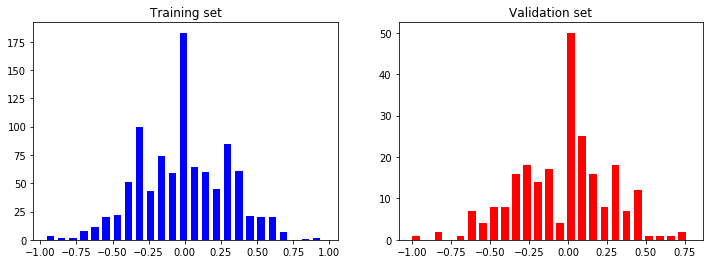

In [93]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width = 0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width = 0.05, color='red')
axes[1].set_title('Validation set')

In [94]:
def zoom(image):
    zoom = iaa.Affine(scale=(1, 1.3))
    image = zoom.augment_image(image)
    return image

Text(0.5, 1, 'Zoomed Image')

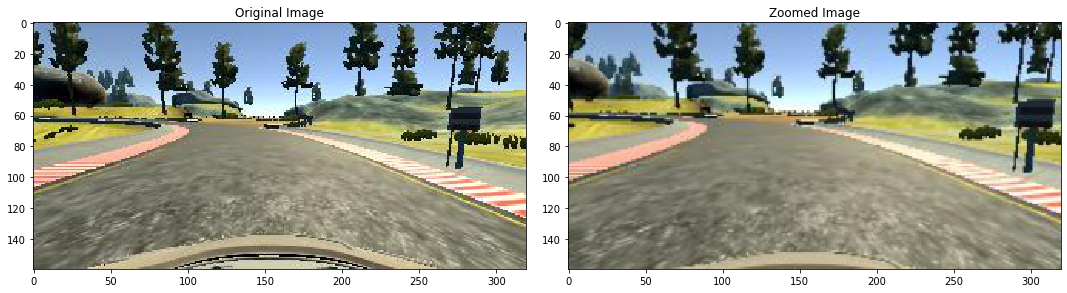

In [95]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')

In [96]:
def pan(image):
    pan = iaa.Affine(translate_percent= {"x" : (-0.1, 0.1), "y" : (-0.1, 0.1)})
    image = pan.augment_image(image)
    return image

Text(0.5, 1, 'Panned Image')

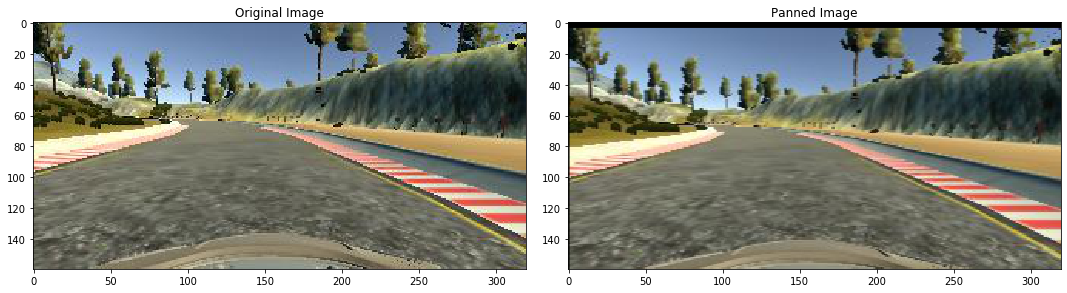

In [97]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
panned_image = pan(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(panned_image)
axs[1].set_title('Panned Image')

In [98]:
def img_random_brightness(image):
    brightness = iaa.Multiply((0.2, 1.2))
    image = brightness.augment_image(image)
    return image

Text(0.5, 1, 'Brightness altered image ')

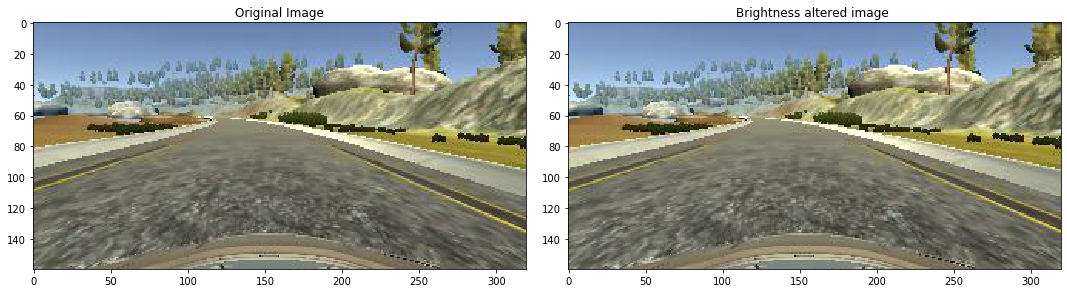

In [99]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
brightness_altered_image = img_random_brightness(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
 
axs[1].imshow(brightness_altered_image)
axs[1].set_title('Brightness altered image ')

In [100]:
def img_preprocess(img):
    img = img[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img, (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    img = img/255
    return img

Text(0.5, 1, 'Preprocessed Image')

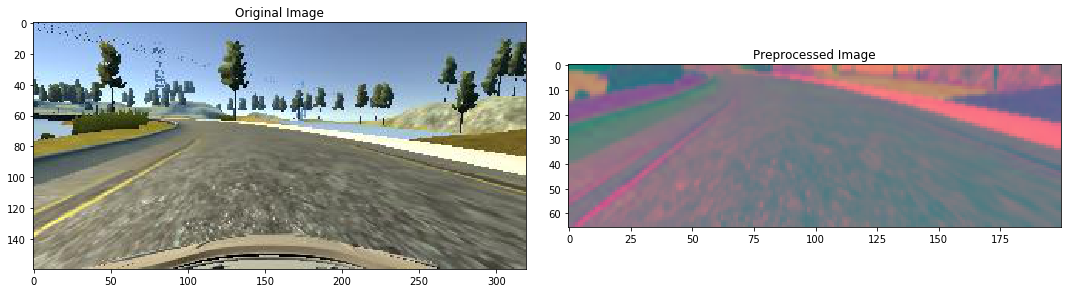

In [101]:
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')

In [114]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):
  
  while True:
    batch_img = []
    batch_steering = []
    
    for i in range(batch_size):
        random_index = random.randint(0, len(image_paths) - 1)
      
        if istraining:
            im, steering = random_augment(image_paths[random_index], steering_ang[random_index])
     
        else:
            im = mpimg.imread(image_paths[random_index])
            steering = steering_ang[random_index]
      
        im = img_preprocess(im)
        batch_img.append(im)
        batch_steering.append(steering)
    yield (np.asarray(batch_img), np.asarray(batch_steering))

Text(0.5, 1, 'Validation Image')

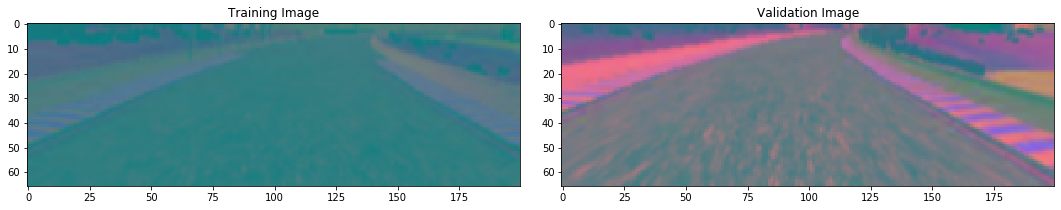

In [115]:
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
x_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid, 1, 0))
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(x_train_gen[0])
axs[0].set_title('Training Image')
 
axs[1].imshow(x_valid_gen[0])
axs[1].set_title('Validation Image')

In [118]:
def nvidia_model():
    model = Sequential()
    model.add(Convolution2D(24, 5, 5, subsample=(2, 2), input_shape=(66, 200, 3), activation='elu'))
    model.add(Convolution2D(36, 5, 5, subsample=(2, 2), activation='elu'))
    model.add(Convolution2D(48, 5, 5, subsample=(2, 2), activation='elu'))
    model.add(Convolution2D(64, 3, 3, activation='elu'))
    model.add(Convolution2D(64, 3, 3, activation='elu'))
    #model.add(Dropout(0.5))
    
    
    model.add(Flatten())
    model.add(Dense(100, activation='elu'))
    #model.add(Dropout(0.5))
    
    model.add(Dense(50, activation='elu'))
    #model.add(Dropout(0.5))
    
    model.add(Dense(10, activation='elu'))
    #model.add(Dropout(0.5))
    
    model.add(Dense(1))
    
    optimizer = Adam(lr=1e-3)
    model.compile(loss='mse', optimizer=optimizer)
    return model

In [119]:
model = nvidia_model()
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)              

C:\Users\Mudit\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), input_shape=(66, 200, ..., activation="elu", strides=(2, 2))`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Mudit\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="elu", strides=(2, 2))`
  after removing the cwd from sys.path.
C:\Users\Mudit\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="elu", strides=(2, 2))`
  """
C:\Users\Mudit\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
  
C:\Users\Mudit\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Co

In [120]:
history = model.fit_generator(batch_generator(X_train, y_train, 100, 1),
                                  steps_per_epoch=300, 
                                  epochs=10,
                                  validation_data=batch_generator(X_valid, y_valid, 100, 0),
                                  validation_steps=200,
                                  verbose=1,
                                  shuffle = 1)

Epoch 1/10
300/300 [==============================] - 183s 610ms/step - loss: 0.1381 - val_loss: 0.0349
Epoch 2/10
300/300 [==============================] - 180s 601ms/step - loss: 0.0629 - val_loss: 0.0456
Epoch 3/10
300/300 [==============================] - 180s 600ms/step - loss: 0.0525 - val_loss: 0.0282
Epoch 4/10
300/300 [==============================] - 181s 603ms/step - loss: 0.0487 - val_loss: 0.0355
Epoch 5/10
300/300 [==============================] - 181s 602ms/step - loss: 0.0454 - val_loss: 0.0425
Epoch 6/10
300/300 [==============================] - 181s 604ms/step - loss: 0.0416 - val_loss: 0.0290
Epoch 7/10
300/300 [==============================] - 179s 598ms/step - loss: 0.0409 - val_loss: 0.0355
Epoch 8/10
300/300 [==============================] - 180s 599ms/step - loss: 0.0376 - val_loss: 0.0422
Epoch 9/10
300/300 [==============================] - 182s 606ms/step - loss: 0.0368 - val_loss: 0.0385
Epoch 10/10
300/300 [==============================] - 180s 600m

Text(0.5, 0, 'Epoch')

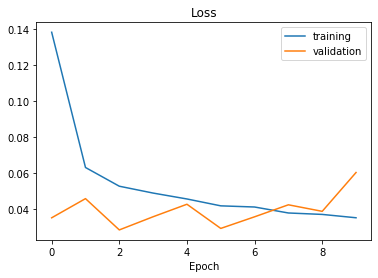

In [121]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [122]:
model.save('model.h5')
print('Saved to disk')

Saved to disk
